In [5]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras


Using TensorFlow backend.


In [6]:
from keras.datasets import mnist

def load_data():
  (train_samples,train_labels), (test_samples,test_labels) = mnist.load_data()
  return train_samples, train_labels, test_samples, test_labels

train_samples, train_labels, test_samples, test_labels = load_data()

11493376/11490434 [==============================] - 64s 6us/step


In [7]:
# check the shape of the data
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)
print(train_labels[0:8])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 1 9 2 1 3]


In [8]:
print(np.amax(train_samples))
print(np.amin(train_samples))

255
0


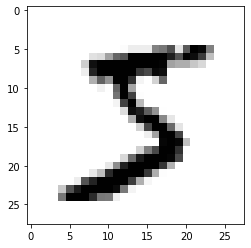

Label of image is 5


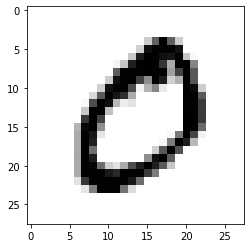

Label of image is 0


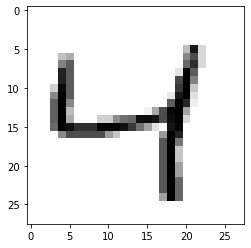

Label of image is 4


In [9]:
for i in range(0,3):
  pixels=train_samples[i]
  plt.imshow(pixels, cmap = plt.cm.binary)
  plt.show()
  print("Label of image is", train_labels[i])

In [10]:
#function to convert datatype to float
def convert_dtype(x):
   
    
    x_float=x.astype('float32')
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [11]:
def normalize(x):
  y = (x - np.min(x))/np.ptp(x)   #ptp function is used to find the range
  return y

train_samples = normalize(train_samples)
test_samples = normalize(test_samples)

In [12]:
# to check if train_samples is normalized or not
np.isclose(np.amax(train_samples), 1)

True

In [13]:
# We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras

def reshape(x):
    
    
    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)

In [14]:
def oneHot(y, Ny):
    
    import tensorflow 
    from keras.utils import to_categorical
    Ny=len(np.unique(y))
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [17]:
results = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=4, batch_size=250)

Train on 54000 samples, validate on 6000 samples
Epoch 1/4
54000/54000 [==============================] - 158s 3ms/step - loss: 0.2607 - accuracy: 0.9245 - val_loss: 0.0742 - val_accuracy: 0.9807
Epoch 2/4
54000/54000 [==============================] - 155s 3ms/step - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.0588 - val_accuracy: 0.9850
Epoch 3/4
54000/54000 [==============================] - 157s 3ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.0527 - val_accuracy: 0.9853
Epoch 4/4
54000/54000 [==============================] - 157s 3ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0552 - val_accuracy: 0.9858


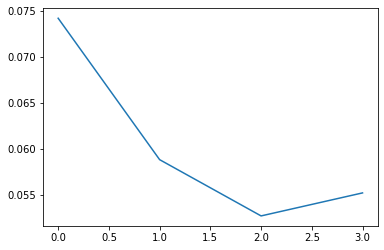

In [18]:
results.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(results.history['val_loss'])), results.history['val_loss'])
plt.show()

In [19]:
plot = pd.DataFrame()
plot['Validation Accuracy'] = model.history.history['val_accuracy']
plot['Training Accuracy'] = model.history.history['accuracy']
plot['Validation Loss'] = model.history.history['val_loss']
plot['Training Loss'] = model.history.history['loss']
plot['Epoch'] = plot.reset_index()['index']+1
plot

,Validation Accuracy,Training Accuracy,Validation Loss,Training Loss,Epoch
0,0.980667,0.924500,0.074180,0.260742,1
1,0.985000,0.977889,0.058804,0.073819,2
2,0.985333,0.984463,0.052687,0.051586,3
3,0.985833,0.987704,0.055189,0.040120,4


In [20]:
def predict(x):
    y = model.predict(x)
    return y

predicted_labels_train = predict(train_samples)

In [21]:
def oneHot_tolabel(y):
    
    y_b=[]
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    y_b[:, 0] = labelencoder.fit_transform(y_b[:, 0])
    return y_b

In [22]:
def accuracy(x_train, y_train, model):
    
    loss,acc = model.evaluate(train_samples, train_labels,verbose=0) 
    return acc

acc = accuracy(train_samples, train_labels, model)
print('Train accuracy is, ', acc*100, '%')

Train accuracy is,  99.03833270072937 %


In [25]:
def accuracy(x_test, y_test, model):
    
    loss,acc = model.evaluate(test_samples, test_labels,verbose=0) 
    return acc

acc = accuracy(test_samples, test_labels, model)
print('Test accuracy is, ', acc*100, '%')

Test accuracy is,  98.47000241279602 %


In [26]:
# Final evaluation of the model
scores = model.evaluate(test_samples, test_labels, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.53%
